In [32]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

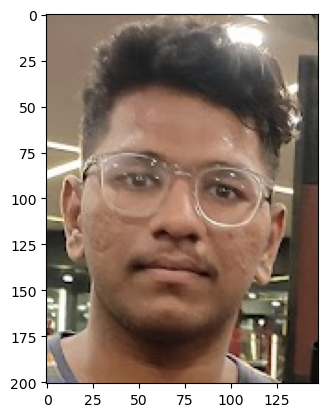

In [3]:
img = image.load_img('Documents/Dataset/Happy or Sad AJAY/training/happy_ajay/1.png')
plt.imshow(img)


In [4]:
cv2.imread('Documents/Dataset/Happy or Sad AJAY/training/happy_ajay/1.png').shape

(201, 148, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_dataset = train.flow_from_directory('Documents/Dataset/Happy or Sad AJAY/training',
                                        target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('Documents/Dataset/Happy or Sad AJAY/Validation',
                                        target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'binary')


Found 26 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'happy_ajay': 0, 'sad_ajay': 1}

In [8]:
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    # Flattening Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy']
    
)

In [11]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=3,
    epochs=50,
    validation_data=validation_dataset
)


Epoch 1/50
3/3 [==============================] - 1s 261ms/step - loss: 0.5096 - accuracy: 0.7778 - val_loss: 0.8388 - val_accuracy: 0.5833
Epoch 2/50
3/3 [==============================] - 1s 252ms/step - loss: 0.2750 - accuracy: 0.8750 - val_loss: 0.9950 - val_accuracy: 0.1667
Epoch 3/50
3/3 [==============================] - 1s 261ms/step - loss: 0.6114 - accuracy: 0.7778 - val_loss: 0.8115 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 1s 252ms/step - loss: 0.2049 - accuracy: 1.0000 - val_loss: 1.4247 - val_accuracy: 0.5833
Epoch 5/50
3/3 [==============================] - 1s 249ms/step - loss: 0.7628 - accuracy: 0.7500 - val_loss: 1.2913 - val_accuracy: 0.5833
Epoch 6/50
3/3 [==============================] - 1s 237ms/step - loss: 0.4277 - accuracy: 0.8750 - val_loss: 1.0857 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 243ms/step - loss: 0.4246 - accuracy: 0.7778 - val_loss: 1.6706 - val_accuracy: 0.4167
Epoch 8/50
3/3 [====

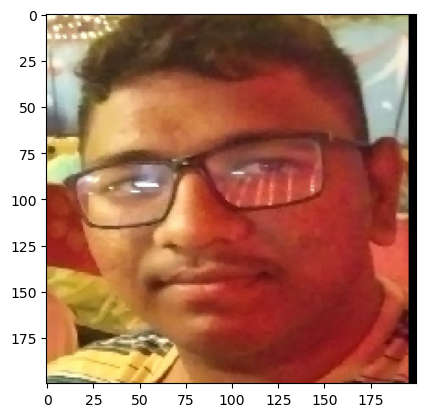

1/1 [==============================] - 0s 39ms/step
Ajay is Happy


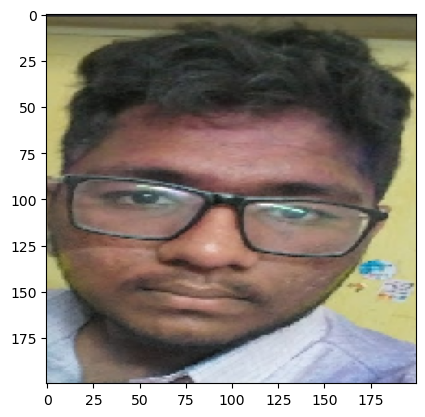

1/1 [==============================] - 0s 32ms/step
Ajay is Happy


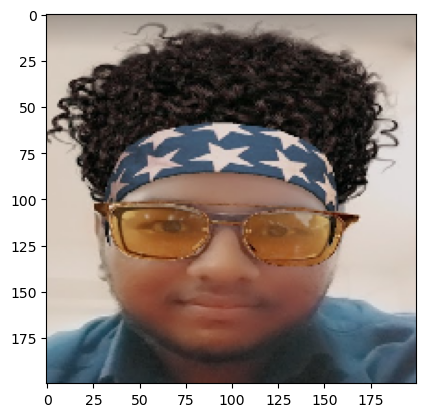

1/1 [==============================] - 0s 38ms/step
Ajay is Happy


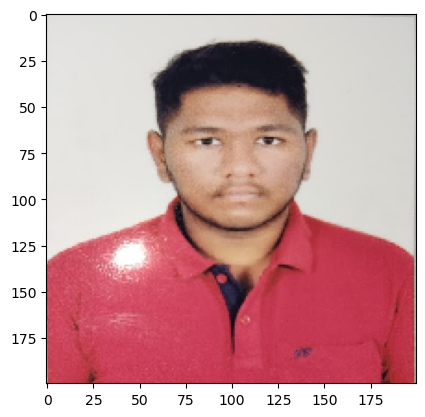

1/1 [==============================] - 0s 31ms/step
Ajay is Happy


In [22]:
dir_path = 'Documents/Dataset/Happy or Sad AJAY/testing'

for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(200, 200))  # Fixed path and closing parenthesis
    plt.imshow(np.array(img))  # Convert PIL image to numpy array for display
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)  # Corrected typo
    images = np.vstack([X])  # Stack the image for prediction

    # Predict using the model
    val = model.predict(images)

    # Output based on prediction result
    if val[0] == 0:
        print('Ajay is Happy')
    else:
        print('Ajay is Sad')
